In [1]:
from Definitions import *
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import os

# Ex. 5.2

Repeat the calculation of the energy using the example in Section 5.4 but for other systems of interest. The pDynamo library includes MOL and PDB coordinate files for miscellaneous molecules so these can be used if necessary. In addition, the library provides parameter sets that are appropriate for certain classes of systems. Are these sets sufficient? If not, which parameters are missing and for which groups?

## Running Example 7 for different BALA conformations

In [2]:
"""Running Example 7"""

# . Header.
logFile.Header()

# . Define the list of structures.
xyzFiles = ["bala_alpha.xyz", "bala_c5.xyz", "bala_c7ax.xyz", "bala_c7eq.xyz"]

# . Define the MM and NB models.
mmModel = MMModelOPLS.WithParameterSet("bookSmallExamples")
nbModel = NBModelFull.WithDefaults()

# . Generate the molecule.
molecule = ImportSystem(os.path.join(molPath, "bala_c7eq.mol"))
molecule.DefineMMModel(mmModel)
molecule.DefineNBModel(nbModel)
molecule.Summary()

# . Loop over the structures in the xyz files.
results = []
for xyzFile in xyzFiles:
    molecule.coordinates3 = ImportCoordinates3(os.path.join(xyzPath, xyzFile))
    energy = molecule.Energy()
    dipole = molecule.DipoleMoment()
    results.append((xyzFile[5:-4], energy, dipole.Norm2()))

# . Output the results.
table = logFile.GetTable(columns = [20, 20, 20])
table.Start()
table.Title("Energy Model Results for bALA")
table.Heading("Conformation")
table.Heading("Energy")
table.Heading("Dipole")
for (label, energy, dipole) in results:
    table.Entry(label, align = Align.Left)
    table.Entry("{:.1f}".format(energy))
    table.Entry("{:.3f}".format(dipole))
table.Stop()

# . Footer.
logFile.Footer()


Start Time: Wed Nov  9 19:09:41 2022

System imported from "~/Programs/pDynamo3/pDynamo3-main/examples/book/data/mol/bala_c7eq.mol" in MDL MOL format.

--------------------------------------------------------------------------------------------------------
                          Summary of System "bALA C7 equatorial configuration"
--------------------------------------------------------------------------------------------------------
------------------------------------------------- Atoms ------------------------------------------------
Atoms                           =                22  Heavy Atoms                     =                10
Hydrogens                       =                12
--------------------------------------------- Connectivity ---------------------------------------------
Angles                          =                36  Atoms                           =                22
Bonds                           =                21  Dihedrals                       =

### We can see that, using the parameters from "bookSmallExamples", we can run the MM calculations for 4 different BALA conformations (alpha, c5, c7ax and c7eq). From these, the most stable is BALA c7eq, as it has the lowest calculated energy.

## Running Example 7 for different ciclohexane conformations

In [3]:
"""Running the same script, for different ciclohexane conformations"""

# . Header.
logFile.Header()

# . Define the list of structures.
xyzFiles = ["cyclohexane_chair.xyz", "cyclohexane_twistboat.xyz"]

# . Define the MM and NB models.
mmModel = MMModelOPLS.WithParameterSet("bookSmallExamples")
nbModel = NBModelFull.WithDefaults()

# . Generate the molecule.
molecule = ImportSystem(os.path.join(molPath, "cyclohexane_chair.mol"))
molecule.DefineMMModel(mmModel)
molecule.DefineNBModel(nbModel)
molecule.Summary()

# . Loop over the structures in the xyz files.
results = []
for xyzFile in xyzFiles:
    molecule.coordinates3 = ImportCoordinates3(os.path.join(xyzPath, xyzFile))
    energy = molecule.Energy()
    dipole = molecule.DipoleMoment()
    results.append((xyzFile[:-4], energy, dipole.Norm2()))

# . Output the results.
table = logFile.GetTable(columns = [20, 20, 20])
table.Start()
table.Title("Energy Model Results for Cyclohexane")
table.Heading("Conformation")
table.Heading("Energy")
table.Heading("Dipole")
for (label, energy, dipole) in results:
    table.Entry(label, align = Align.Left)
    table.Entry("{:.1f}".format(energy))
    table.Entry("{:.3f}".format(dipole))
table.Stop()

# . Footer.
logFile.Footer()


Start Time: Wed Nov  9 19:09:41 2022

System imported from "~/Programs/pDynamo3/pDynamo3-main/examples/book/data/mol/cyclohexane_chair.mol" in MDL MOL format.

------------------------------------------------------------------------------------------------
                       Summary of System "Cyclohexane chair conformation"
------------------------------------------------------------------------------------------------
--------------------------------------------- Atoms --------------------------------------------
Atoms                       =                18  Heavy Atoms                 =                 6
Hydrogens                   =                12
----------------------------------------- Connectivity -----------------------------------------
Angles                      =                36  Atoms                       =                18
Bonds                       =                18  Dihedrals                   =                54
Isolates                    =         

### We can see that, for hexane, the program works with parameters from "bookSmallExamples", showing that the chair conformation is more stable, as expected.

## Running Example 7 for methane and water

In [4]:
"""Running Example 7"""

# . Header.
logFile.Header()

# . Define the list of structures.
mol_files = ["methane.mol", "water.mol", "waterDimer_cs.mol"]

# . Define the MM and NB models.
mmModel = MMModelOPLS.WithParameterSet("bookSmallExamples")
nbModel = NBModelFull.WithDefaults()

# . Loop over the structures in the xyz files.
results = []
for file in mol_files:
    # Generate the molecule
    molecule = ImportSystem(os.path.join(molPath, file))
    molecule.DefineMMModel(mmModel)
    molecule.DefineNBModel(nbModel)
    molecule.Summary()
    # MM calculations
    energy = molecule.Energy()
    dipole = molecule.DipoleMoment()
    results.append((file[:-4], energy, dipole.Norm2()))

# . Output the results.
table = logFile.GetTable(columns = [20, 20, 20])
table.Start()
table.Title("Energy Model Results")
table.Heading("Conformation")
table.Heading("Energy")
table.Heading("Dipole")
for (label, energy, dipole) in results:
    table.Entry(label, align = Align.Left)
    table.Entry("{:.1f}".format(energy))
    table.Entry("{:.3f}".format(dipole))
table.Stop()

# . Footer.
logFile.Footer()


Start Time: Wed Nov  9 19:09:41 2022

System imported from "~/Programs/pDynamo3/pDynamo3-main/examples/book/data/mol/methane.mol" in MDL MOL format.

--------------------------------------------------------------------------------------------
                                 Summary of System "Methane"
--------------------------------------------------------------------------------------------
------------------------------------------- Atoms ------------------------------------------
Atoms                     =                 5  Heavy Atoms               =                 1
Hydrogens                 =                 4
--------------------------------------- Connectivity ---------------------------------------
Angles                    =                 6  Atoms                     =                 5
Bonds                     =                 4  Dihedrals                 =                 0
Isolates                  =                 1  Ring Sets                 =                 

### The program was able to perform MM calculations for methane, water and a water dimer using the "bookSmallExamples" parameters. We can see the effect of non-bonding interations analysing the water calculations. The water dimer is more stable than a lone water molecule, because of intermolecular interactions between the water molecules.

## Running Example 7 for an Argon 13 cluster

In [5]:
"""Running Example 7"""

# . Header.
logFile.Header()

# . Define the list of structures.
mol_files = ["argon13.mol"]

# . Define the MM and NB models.
mmModel = MMModelOPLS.WithParameterSet("bookSmallExamples")
nbModel = NBModelFull.WithDefaults()

# . Loop over the structures in the xyz files.
results = []
for file in mol_files:
    # Generate the molecule
    molecule = ImportSystem(os.path.join(molPath, file))
    molecule.DefineMMModel(mmModel)
    molecule.DefineNBModel(nbModel)
    molecule.Summary()
    # MM calculations
    energy = molecule.Energy()
    dipole = molecule.DipoleMoment()
    results.append((file[:-4], energy, dipole.Norm2()))

# . Output the results.
table = logFile.GetTable(columns = [20, 20, 20])
table.Start()
table.Title("Energy Model Results")
table.Heading("Conformation")
table.Heading("Energy")
table.Heading("Dipole")
for (label, energy, dipole) in results:
    table.Entry(label, align = Align.Left)
    table.Entry("{:.1f}".format(energy))
    table.Entry("{:.3f}".format(dipole))
table.Stop()

# . Footer.
logFile.Footer()


Start Time: Wed Nov  9 19:09:42 2022

System imported from "~/Programs/pDynamo3/pDynamo3-main/examples/book/data/mol/argon13.mol" in MDL MOL format.

------------------------------------------------------------------------------
                                 Untyped Atoms
------------------------------------------------------------------------------
Ar0   Ar8   Ar6   Ar11  Ar10  Ar5   Ar12  Ar9   Ar7   Ar1   Ar3   Ar4   Ar2
------------------------------------------------------------------------------


MMModelError: ('There are 13 untyped atoms.', {<pMolecule.Atom.Atom object at 0x7fa27e522020>, <pMolecule.Atom.Atom object at 0x7fa27e522e30>, <pMolecule.Atom.Atom object at 0x7fa27e522290>, <pMolecule.Atom.Atom object at 0x7fa27e523ac0>, <pMolecule.Atom.Atom object at 0x7fa27e521ed0>, <pMolecule.Atom.Atom object at 0x7fa27e5222f0>, <pMolecule.Atom.Atom object at 0x7fa27e5234f0>, <pMolecule.Atom.Atom object at 0x7fa27e520dc0>, <pMolecule.Atom.Atom object at 0x7fa27e522350>, <pMolecule.Atom.Atom object at 0x7fa27e523970>, <pMolecule.Atom.Atom object at 0x7fa27e520b80>, <pMolecule.Atom.Atom object at 0x7fa27e520fa0>, <pMolecule.Atom.Atom object at 0x7fa27e5213c0>})

### We can see that there was an error. This error happened because the Ar atom isn't specified in the "bookSmallExamples" parameters. Therefore, the MM calculations cannot be performed.

In [6]:
! cat /home/artur/Programs/pDynamo3/pDynamo3-main/parameters/forceFields/opls/bookSmallExamples/atomTypes.yaml

---
# . !MMAtomTypeContainer
Label: Book Small Examples
Parameter Fields:
    - Label
    - Atomic Number
    - Charge
    - Hydrogen Type
    - Description
Parameter Values:
    - [ H ,   1,   0.300,  null,  Amide hydrogen     ]
    - [ HC,   1,   0.060,  null,  Aliphatic hydrogen ]
    - [ HW,   1,   0.417,  null,  Water hydrogen     ]
    - [ C ,   6,   0.500,  null,  Amide carbon       ]
    - [ CT,   6,   0.000,  HC  ,  Tetrahedral carbon ]
    - [ N ,   7,  -0.500,  H   ,  Amide nitrogen     ]
    - [ O ,   8,  -0.500,  null,  Amide oxygen       ]
    - [ OW,   8,  -0.834,  HW  ,  Water oxygen       ]
    - [ Na,  11,   1.000,  null,  Sodium cation      ]
    - [ Cl,  17,  -1.000,  null,  Chloride anion     ]
    - [ K ,  19,   1.000,  null,  Potassium cation   ]
...


### We can see here all the atom types defined in the "bookSmallExamples" parameters. All the atoms present in the other examples (BALA conformations, cyclohexane conformations, water and methane) are present in the "bookSmallExamples" parameters. However, the Ar atom is not present, resulting in the error presented above.

# Ex. 5.3

The parameter set "booksmallexamples" contains definitions for water and also sodium and chloride ions. Using this set, determine the energies of some water–water and water–ion complexes. In each case the geometry of the water molecules can be kept fixed, but the relative orientation of the molecules or molecule and ion can be altered. Devise a search procedure to investigate automatically and systematically a range of configurations for
the complexes. What is the shape of the potential energy surface for the system? What are the most stable configurations for the interaction of a water molecule with the sodium cation, the chloride anion and another water molecule? The energy of interaction between the molecules is, of course, due to non-bonding terms only. What are the relative contributions of the electrostatic and Lennard-Jones terms for each of the three complexes?

## Rotating Na+ around the H20 molecule

In [7]:
# First, I'll import a water molecule and center it by it's molecular weight
# Imoporting
water = ImportSystem("data/mol/water.mol")
water.Summary()
print(f"\nWater atoms positions before translating to center:\n{[i for i in water.coordinates3]}")

# Translate the system to its center of mass.
masses = Array.FromIterable([atom.mass for atom in water.atoms])
water.coordinates3.TranslateToCenter(weights=masses)
print(f"\nWater atoms positions after translating to center:\n{[i for i in water.coordinates3]}")

# Adding Na+
na = ImportSystem("/home/artur/HDD/HD-Ubuntu/Temporário/899.mol")
water_na = MergeByAtom(water, na)

# Saving system
ExportSystem(path="data/mol/water_center_na.mol", system=water_na)


System imported from "data/mol/water.mol" in MDL MOL format.

--------------------------------------------------------------------------------
                            Summary of System "Water"
--------------------------------------------------------------------------------
------------------------------------- Atoms ------------------------------------
Atoms                   =             3  Heavy Atoms             =             1
Hydrogens               =             2
--------------------------------- Connectivity ---------------------------------
Angles                  =             1  Atoms                   =             3
Bonds                   =             2  Dihedrals               =             0
Isolates                =             1  Ring Sets               =             0
--------------------------------------------------------------------------------

Water atoms positions before translating to center:
[0.0, 0.0, 0.0, 0.58, 0.75, 0.0, 0.58, -0.75, 0.0]

Water ato

In [8]:
# Now I'll calculate the x and y positions for the Na atom
x_coords = np.linspace(-4, 4, 15)
degrees = np.linspace(180, 0, 15)

for x, degree in zip(x_coords, degrees):
    y = math.sqrt(16-(x*x))
    with open(f"water_na/water_na_{degree:.2f}.mol", "w") as f:
        f.write(f"""Merged System


  4  2  0  0  0  0  0  0  0  0999 V2000
   -0.0649    0.0000    0.0000 O   0  0  0  0  0
    0.5151    0.7500    0.0000 H   0  0  0  0  0
    0.5151   -0.7500    0.0000 H   0  0  0  0  0
   {x: .4f}    {y:.4f}    0.0000 Na  0  0  0  0  0
  1  2  1  0  0  0
  1  3  1  0  0  0
M  CHG  1   4   1
M  END
""")
        

### At 0º:
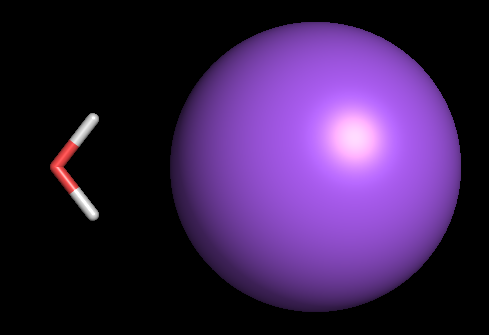
### At 51º:
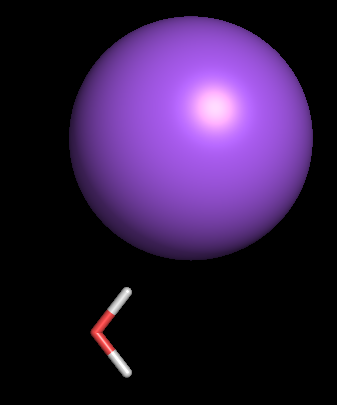
### At 90º:
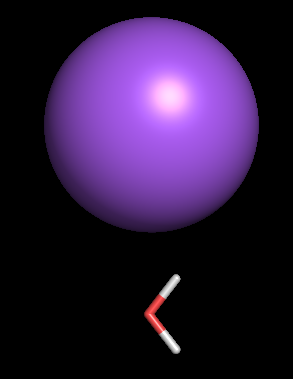
### At 141º:
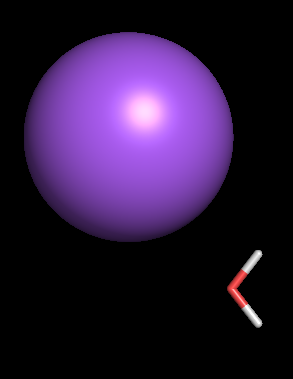
### At 180º:
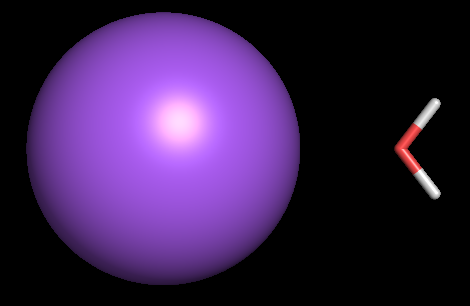

In [9]:
%%capture
# Importing Systems
systems_na = [ImportSystem(f"water_na/water_na_{degree:.2f}.mol") for degree in degrees]


System imported from "water_na/water_na_180.00.mol" in MDL MOL format.

System imported from "water_na/water_na_167.14.mol" in MDL MOL format.

System imported from "water_na/water_na_154.29.mol" in MDL MOL format.

System imported from "water_na/water_na_141.43.mol" in MDL MOL format.

System imported from "water_na/water_na_128.57.mol" in MDL MOL format.

System imported from "water_na/water_na_115.71.mol" in MDL MOL format.

System imported from "water_na/water_na_102.86.mol" in MDL MOL format.

System imported from "water_na/water_na_90.00.mol" in MDL MOL format.

System imported from "water_na/water_na_77.14.mol" in MDL MOL format.

System imported from "water_na/water_na_64.29.mol" in MDL MOL format.

System imported from "water_na/water_na_51.43.mol" in MDL MOL format.

System imported from "water_na/water_na_38.57.mol" in MDL MOL format.

System imported from "water_na/water_na_25.71.mol" in MDL MOL format.

System imported from "water_na/water_na_12.86.mol" in MDL MOL format.

In [10]:
%%capture
# Define the MM and NB models.
mmModel = MMModelOPLS.WithParameterSet("bookSmallExamples")
nbModel = NBModelFull.WithDefaults()

results_na = {}
energies_na = []

for geometry, degree in zip(systems_na, degrees):
    geometry.DefineMMModel(mmModel)
    geometry.DefineNBModel(nbModel)
    
    energy = geometry.Energy()
    
    results_na[degree] = [energy, geometry.DipoleMoment().Norm2()]
    energies_na.append(energy)

results_na


------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =         -40.9710  RMS Gradient            =             None
Harmonic Angle          =           0.0001  Harmonic Bond           =           0.3667
MM/MM 1-4 Electrostatic =           0.0000  MM/MM 1-4 Lennard-Jones =           0.0000
MM/MM Electrostatic     =         -41.2944  MM/MM Lennard-Jones     =          -0.0743
Urey-Bradley            =           0.0309
--------------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =         -34.3769  RMS Gradient            =             None
Harmonic Angle          =           0.0001  Harmonic Bond           =           0.3667
MM/MM 1-4 Electrostatic =           0.0000  MM/MM 1-4 Lennard-Jones =           0.0000
MM/MM Electrostatic     =         -34.7009  MM/MM Lennard-Jones     =          -0.073

In [11]:
results_na

{180.0: [-40.97095189252391, 16.889540375298132],
 167.14285714285714: [-34.37686958719466, 17.263060967696404],
 154.28571428571428: [-27.582352924973183, 17.62833497715688],
 141.42857142857144: [-20.609952945398312, 17.986579063748035],
 128.57142857142856: [-13.498877718335898, 18.337641434752282],
 115.71428571428571: [-6.302573069101965, 18.682512815455457],
 102.85714285714286: [0.9023855732885984, 19.020694258913657],
 90.0: [8.012170321871249, 19.352940047548252],
 77.14285714285714: [14.894763527390559, 19.679787206516522],
 64.28571428571428: [21.38549400739323, 20.00137939970086],
 51.428571428571416: [27.285905200407395, 20.317362047848746],
 38.571428571428555: [32.367809796568494, 20.62887170964472],
 25.714285714285722: [36.391359572649264, 20.935585257309484],
 12.857142857142861: [39.114904550462725, 21.238302388892688],
 0.0: [40.33136141296666, 21.536387879102847]}

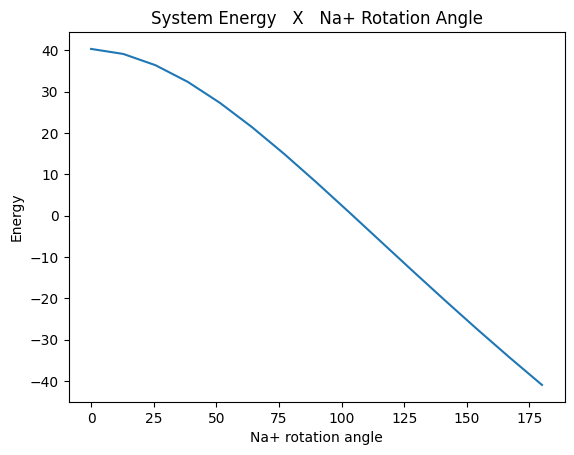

In [12]:
fig, axs = plt.subplots()

axs.plot(degrees, energies_na)
axs.set_title("System Energy   X   Na+ Rotation Angle")
axs.set_ylabel("Energy")
axs.set_xlabel("Na+ rotation angle")

plt.show()

In [13]:
print(f"The most favorable angle (with the least energy) is: 180º")
print(f"The lest favorable angle (with the most energy) is: 0º")

The most favorable angle (with the least energy) is: 180º
The lest favorable angle (with the most energy) is: 0º


### Most favorable:
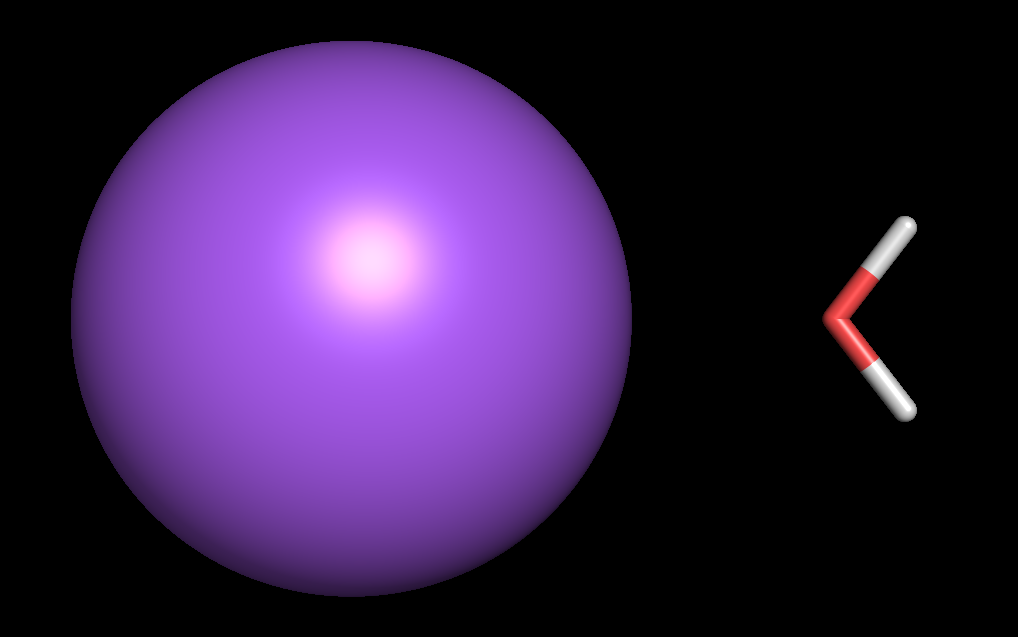
### Least favorable:
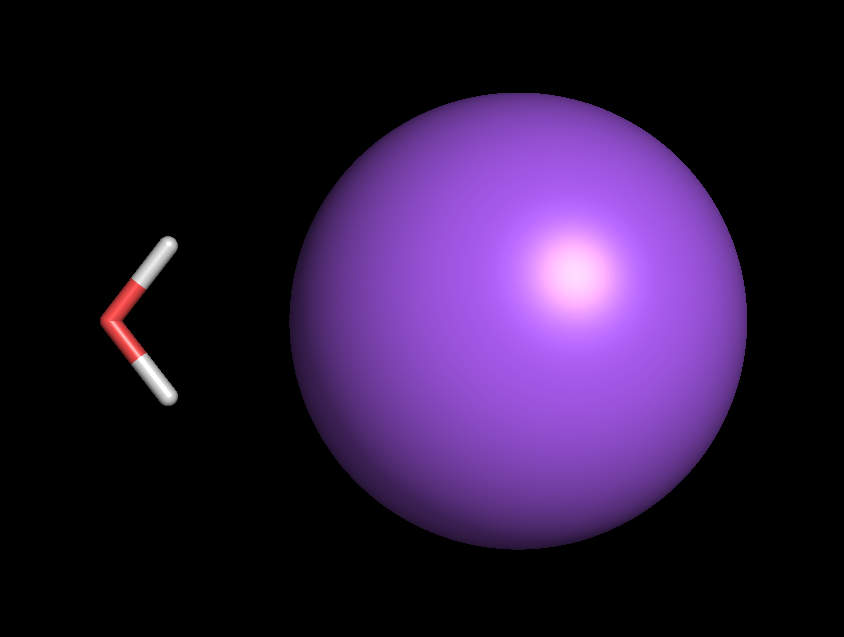

### We can see that the most stable geometry is the one where the Na+ atom is closest to the O atom. This makes chemical sense, as the O atom has a partial negative charge.

### Also as expected, the least favourable geometry is the one where the Na+ atom is closer to the H atoms. This makes chemical sense, as the H atoms has partial positive charges.

## Rotating Cl- around the H20 molecule

In [14]:
# Now I'll calculate the x and y positions for the Na atom
x_coords = np.linspace(-4, 4, 15)
degrees = np.linspace(180, 0, 15)

for x, degree in zip(x_coords, degrees):
    y = math.sqrt(16-(x*x))
    with open(f"water_cl/water_cl_{degree:.2f}.mol", "w") as f:
        f.write(f"""Merged System


  4  2  0  0  0  0  0  0  0  0999 V2000
   -0.0649    0.0000    0.0000 O   0  0  0  0  0
    0.5151    0.7500    0.0000 H   0  0  0  0  0
    0.5151   -0.7500    0.0000 H   0  0  0  0  0
   {x: .4f}    {y:.4f}    0.0000 Cl  0  0  0  0  0
  1  2  1  0  0  0
  1  3  1  0  0  0
M  CHG  1   4  -1
M  END
""")

In [15]:
%%capture
# Importing Systems
systems_cl = [ImportSystem(f"water_cl/water_cl_{degree:.2f}.mol") for degree in degrees]


System imported from "water_cl/water_cl_180.00.mol" in MDL MOL format.

System imported from "water_cl/water_cl_167.14.mol" in MDL MOL format.

System imported from "water_cl/water_cl_154.29.mol" in MDL MOL format.

System imported from "water_cl/water_cl_141.43.mol" in MDL MOL format.

System imported from "water_cl/water_cl_128.57.mol" in MDL MOL format.

System imported from "water_cl/water_cl_115.71.mol" in MDL MOL format.

System imported from "water_cl/water_cl_102.86.mol" in MDL MOL format.

System imported from "water_cl/water_cl_90.00.mol" in MDL MOL format.

System imported from "water_cl/water_cl_77.14.mol" in MDL MOL format.

System imported from "water_cl/water_cl_64.29.mol" in MDL MOL format.

System imported from "water_cl/water_cl_51.43.mol" in MDL MOL format.

System imported from "water_cl/water_cl_38.57.mol" in MDL MOL format.

System imported from "water_cl/water_cl_25.71.mol" in MDL MOL format.

System imported from "water_cl/water_cl_12.86.mol" in MDL MOL format.

In [16]:
%%capture
# Define the MM and NB models.
mmModel = MMModelOPLS.WithParameterSet("bookSmallExamples")
nbModel = NBModelFull.WithDefaults()

results_cl = {}
energies_cl = []

for geometry, degree in zip(systems_cl, degrees):
    geometry.DefineMMModel(mmModel)
    geometry.DefineNBModel(nbModel)
    
    energy = geometry.Energy()
    
    results_cl[degree] = [energy, geometry.DipoleMoment().Norm2()]
    energies_cl.append(energy)

results_cl


------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =          41.1618  RMS Gradient            =             None
Harmonic Angle          =           0.0001  Harmonic Bond           =           0.3667
MM/MM 1-4 Electrostatic =           0.0000  MM/MM 1-4 Lennard-Jones =           0.0000
MM/MM Electrostatic     =          41.2944  MM/MM Lennard-Jones     =          -0.5303
Urey-Bradley            =           0.0309
--------------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =          34.5639  RMS Gradient            =             None
Harmonic Angle          =           0.0001  Harmonic Bond           =           0.3667
MM/MM 1-4 Electrostatic =           0.0000  MM/MM 1-4 Lennard-Jones =           0.0000
MM/MM Electrostatic     =          34.7009  MM/MM Lennard-Jones     =          -0.534

In [17]:
results_cl

{180.0: [41.16176648240804, 21.536387879102847],
 167.14285714285714: [34.563907603952586, 21.238302388892688],
 154.28571428571428: [27.766059593272296, 20.935585257309484],
 141.42857142857144: [20.790695194529597, 20.62887170964472],
 128.57142857142856: [13.677044571163822, 20.317362047848746],
 115.71428571428571: [6.478503884490618, 20.00137939970086],
 102.85714285714286: [-0.7283270832115212, 19.679787206516522],
 90.0: [-7.839664424723168, 19.352940047548252],
 77.14285714285714: [-14.723511200081127, 19.020694258913657],
 64.28571428571428: [-21.215204552469807, 18.682512815455457],
 51.428571428571416: [-27.116295683381843, 18.337641434752282],
 38.571428571428555: [-32.19862627395987, 17.986579063748035],
 25.714285714285722: [-36.22235429296702, 17.62833497715688],
 12.857142857142861: [-38.94584321463578, 17.263060967696404],
 0.0: [-40.162022685473715, 16.889540375298132]}

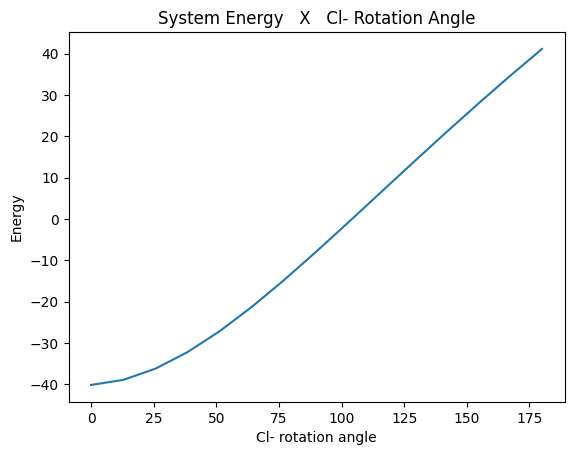

In [18]:
fig, axs = plt.subplots()

axs.plot(degrees, energies_cl)
axs.set_title("System Energy   X   Cl- Rotation Angle")
axs.set_ylabel("Energy")
axs.set_xlabel("Cl- rotation angle")

plt.show()

In [19]:
print(f"The most favorable angle (with the least energy) is: 0º")
print(f"The lest favorable angle (with the most energy) is: 180º")

The most favorable angle (with the least energy) is: 0º
The lest favorable angle (with the most energy) is: 180º


### Most favorable
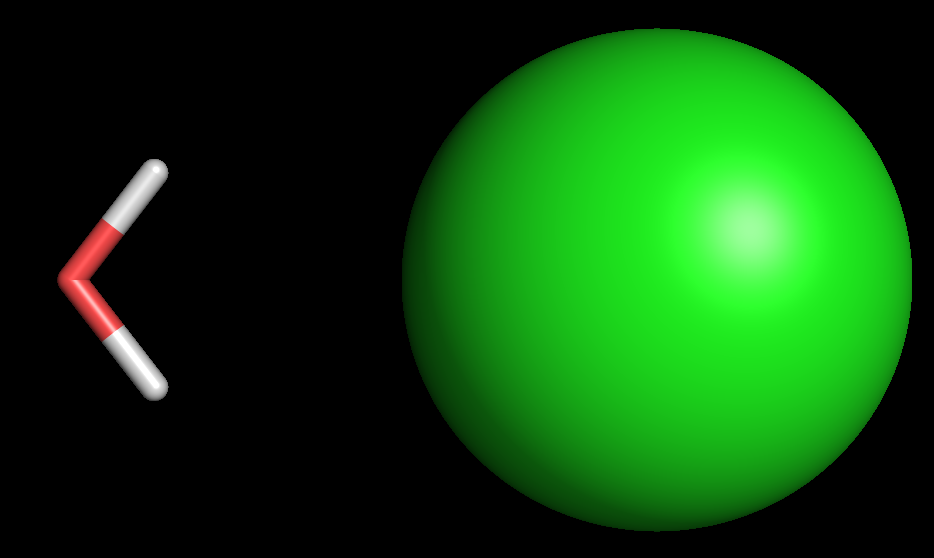
### Least favorable
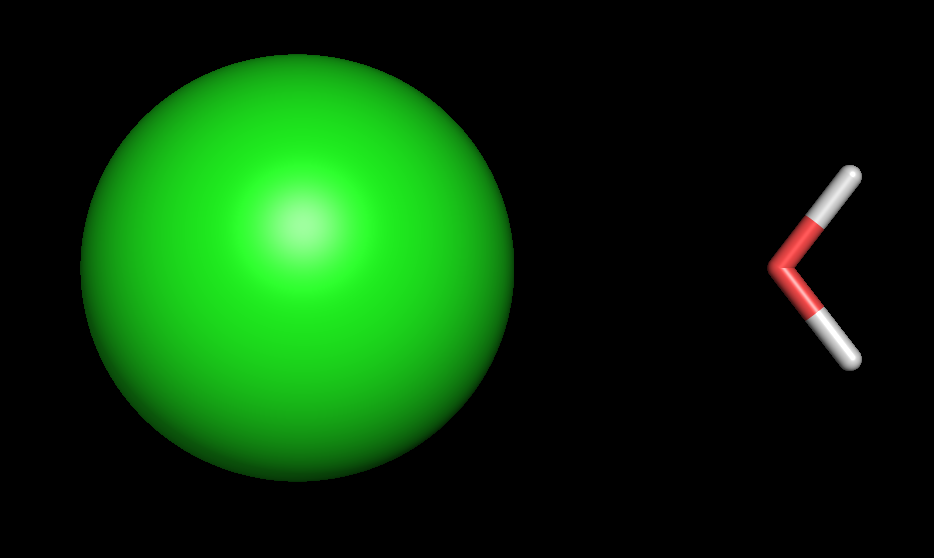

### We can see that the most stable geometry is the one where the Cl- atom is closest to the H atoms. This makes chemical sense, as the H atoms have partial positive charges.

### Also as expected, the least favourable geometry is the one where the Cl- atom is closer to the O atom. This makes chemical sense, as the O atom has a partial negative charge.

## Water water

For the water-water interactions we thought that one good approach would be rotating one of the water molecule on its own axis and calculating the enegies as it rotates relative to the other one. The first step was to develop a rudimentary algorithm that generates different geometries of the system. We create a function for rotating the hydrogens of the water that's in the origin using a simple rotation matrix:

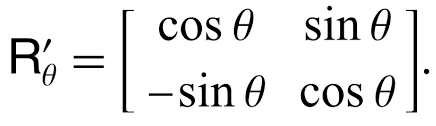

In [20]:
# Creating a function to rotate a vector in relation to the origin
def rotation_point(x, y, theta):
    theta = np.radians(theta)
    cos = math.cos(theta)
    sin = math.sin(theta)
    x_prime = x*cos - y*sin
    y_prime = x*sin + y*cos
    return [x_prime, y_prime]

# Initial Coords of the Hydrogens bound to the centered in origin oxygen of the water:
h_1 = [0.0000, 0.9500]
h_2 = [0.8957, -0.3167]

# Rotation of Hydrogens Procedure
theta_list = list(range(0,181, 10)) #list of angles, 0 to 180 +10 increment
h_1_rot = []
h_2_rot = []

# Calculating the rotation to each hydrogen atom (they both need to move simultaneously)
for angle in theta_list:
    h_1_rot.append(rotation_point(x=h_1[0], y=h_1[1], theta=angle))
    h_2_rot.append(rotation_point(x=h_2[0], y=h_2[1], theta=angle))

# Creating an array to create a dict to create a pandas dataframe (very inefficent)
h_1_rot = np.stack((h_1_rot), axis = -1)
h_2_rot = np.stack((h_2_rot), axis = -1)

# Creating a dicto to be converted into a dataframe
rotat_dict = {"x_1": h_1_rot[0], "y_1": h_1_rot[1],
             "x_2": h_2_rot[0], "y_2": h_2_rot[1]}

# Creating a dataframe
coords = pd.DataFrame(rotat_dict)
coords.head()

,x_1,y_1,x_2,y_2
0,0.000000,0.950000,0.895700,-0.316700
1,-0.164966,0.935567,0.937087,-0.156352
2,-0.324919,0.892708,0.950000,0.008747
3,-0.475000,0.822724,0.934049,0.173580
4,-0.610648,0.727742,0.889717,0.333139


After creating a series of hydrogen's pair of coordinates with respect of the origin centered oxygen, generate each geometry. For the sake of ilustration the main idea behind it can be seen below:

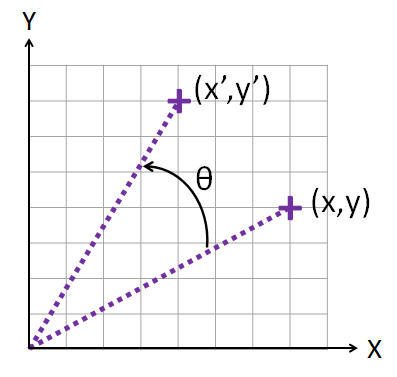

Although the image above is rotating only one point, we're rotating two points simoutaneously (mantaining their distance relative to each other and from the origin/oxygen respectively). Below we write those files substituting each hydrogen coordinate.

In [21]:
# Creating the files into the "water" folder make sure you have it on your working directory
# The main issue here is to format the .mol files into according spacing. The ": 4.4f" does the job in this case
for n in range(len(theta_list)):
    with open(f"water_water/water_water_{chr(97+n)}_{theta_list[n]}.mol", "w") as f:
        f.write(f"""
  -MOLDEN-
Molden generated mol file
  6  4  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   {round(coords['x_1'][n],5):= 4.4f}    0.0000   {round(coords['y_1'][n], 5):= 4.4f} H   0  0  0  0  0  0  0  0  0  0  0  0
   {round(coords['x_2'][n],5):= 4.4f}    0.0000   {round(coords['y_2'][n], 5):= 4.4f} H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5141    0.0000   -3.1111 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.4098    0.0000   -2.7945 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0165    0.0000   -3.9204 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  1  3  1  0  0  0  0
  4  5  1  0  0  0  0
  4  6  1  0  0  0  0
M  END
""")

After exporting each geometry, we manually checked using Pymol. Here is some examples generated for this exercise:
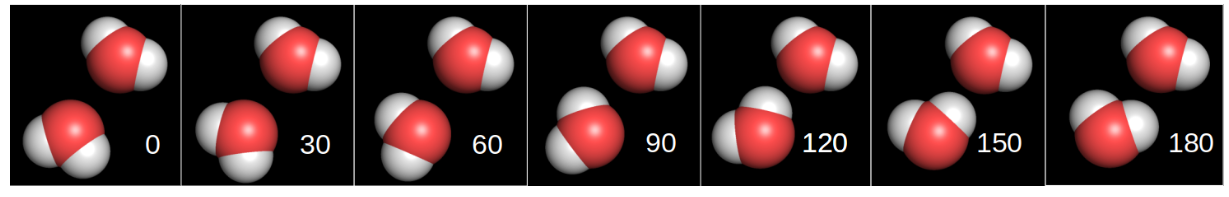

In [22]:
%%capture
# Defining the mm and non-bonding models
mmModel = MMModelOPLS.WithParameterSet("bookSmallExamples")
nbModel = NBModelFull.WithDefaults()

# Loading the data
water_water_files = sorted(os.listdir("water_water"))

# Empty results
energies = []
systems = []
angles = theta_list
results = {}

for geometry in water_water_files:
    sys = ImportSystem(f"water_water/{geometry}")
    sys.DefineMMModel(mmModel)
    sys.DefineNBModel(nbModel)
    energy = sys.Energy()

    energies.append(energy)
    systems.append(geometry)


System imported from "water_water/water_water_a_0.mol" in MDL MOL format.

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =          77.4636  RMS Gradient            =             None
Harmonic Angle          =          58.9826  Harmonic Bond           =           0.4567
MM/MM 1-4 Electrostatic =           0.0000  MM/MM 1-4 Lennard-Jones =           0.0000
MM/MM Electrostatic     =           5.9426  MM/MM Lennard-Jones     =          -0.4627
Urey-Bradley            =          12.5444
--------------------------------------------------------------------------------------

System imported from "water_water/water_water_b_10.mol" in MDL MOL format.

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =          77.6585  RMS Gradient            =             None
Harmonic Angle          =          58.9819  Harmonic Bond           =           0.4554
MM/MM 1-4 Electrostat


------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =          65.4189  RMS Gradient            =             None
Harmonic Angle          =          58.9809  Harmonic Bond           =           0.4550
MM/MM 1-4 Electrostatic =           0.0000  MM/MM 1-4 Lennard-Jones =           0.0000
MM/MM Electrostatic     =          -6.0988  MM/MM Lennard-Jones     =          -0.4627
Urey-Bradley            =          12.5445
--------------------------------------------------------------------------------------

System imported from "water_water/water_water_p_150.mol" in MDL MOL format.

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =          65.0779  RMS Gradient            =             None
Harmonic Angle          =          58.9829  Harmonic Bond           =           0.4589
MM/MM 1-4 Electrostatic =           0.0000  MM/MM 1-4 Lennard-Jones =           0.0000
MM/MM El

Analysing the results for the water-water system for the geometries generated:

In [23]:
results["geometry"] = systems
results["energy"] = energies
results["angle"] = angles

results_df = pd.DataFrame(results)

In [24]:
results_df

,geometry,energy,angle
0,water_water_a_0.mol,77.463606,0
1,water_water_b_10.mol,77.658526,10
2,water_water_c_20.mol,77.672602,20
3,water_water_d_30.mol,77.506516,30
4,water_water_e_40.mol,77.156342,40
5,water_water_f_50.mol,76.598984,50
6,water_water_g_60.mol,75.842555,60
7,water_water_h_70.mol,74.856726,70
8,water_water_i_80.mol,73.647606,80
9,water_water_j_90.mol,72.233007,90


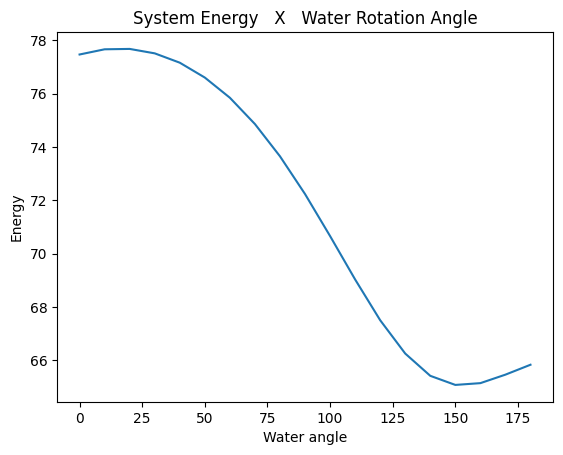

In [25]:
fig, axs = plt.subplots()

axs.plot(results_df["angle"], results_df["energy"])
axs.set_title("System Energy   X   Water Rotation Angle")
axs.set_ylabel("Energy")
axs.set_xlabel("Water angle")

plt.show()

In [26]:
print("The max Energy geometry:")
results_df.loc[results_df["energy"] == max(results_df["energy"])]

The max Energy geometry:


,geometry,energy,angle
2,water_water_c_20.mol,77.672602,20


In [27]:
print("The min Energy geometry:")
results_df.loc[results_df["energy"] == min(results_df["energy"])]

The min Energy geometry:


,geometry,energy,angle
15,water_water_p_150.mol,65.077924,150


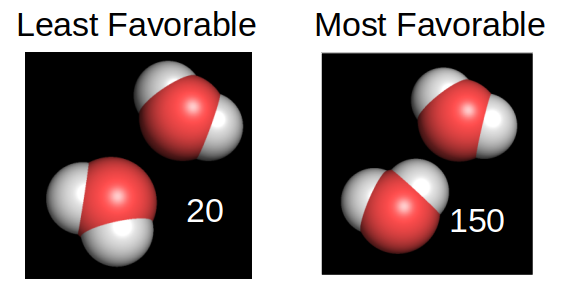

### The mos favorable water water geometry is the one at 120º. This makes chemical sense, as, in this position, the H atom (which has positive partial charge) is the closes to the O atom, (which has negative partial charge).

### The least favorable geometry is the one at 20º. This makes chemical sense, as the O atoms are the closest in this position, and both have positive partial charges.